In [2]:
import warnings #For removing warning messages which is not important
warnings.filterwarnings('ignore')

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics

In [4]:
# Import Data
csv_file = 'resaleprice.csv'
resale_data_original = pd.read_csv(csv_file)
resale_data_original.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


# Data Cleaning

In [5]:
#Checking for Data Types
resale_data_original.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [6]:
#Splitting Up storey_range column to min and max storey columns
resale_data_cleaned = resale_data_original
resale_data_cleaned[["min_storey","max_storey"]] = resale_data_cleaned["storey_range"].str.split("TO", expand= True)
resale_data_cleaned["min_storey"] = resale_data_cleaned["min_storey"].astype(int)
resale_data_cleaned["max_storey"] = resale_data_cleaned["max_storey"].astype(int)

#Dropping storey_range column
resale_data_cleaned.drop("storey_range", axis = 1, inplace = True)

In [7]:
#Converting remainging_lease column into months for easier analysis
years_and_months = resale_data_cleaned["remaining_lease"].str.split()
years = years_and_months.str[0].astype(int)
months = pd.to_numeric(years_and_months.str.get(2), errors='coerce').fillna(0).astype(int)
total_months = years*12 + months
resale_data_cleaned["remaining_lease_months"] = total_months

#Drop remaining_lease column
resale_data_cleaned.drop("remaining_lease", axis = 1, inplace = True)

In [8]:
#Moving resale_price column to the end since its the independent variable for tidiness
columns = list(resale_data_cleaned.columns)
columns.append(columns.pop(columns.index('resale_price')))
resale_data_cleaned = resale_data_cleaned.reindex(columns=columns)

In [9]:
#Filtering the data such that only the last year of data is used for analysis

# Convert the "month" column to datetime format
resale_data_cleaned['month'] = pd.to_datetime(resale_data_cleaned['month'])

# Filter the DataFrame to include only data from Feb 2022 to Feb 2023
mask = (resale_data_cleaned['month'] >= '2022-02-01') & (resale_data_cleaned['month'] <= '2023-02-28')
resale_data_cleaned = resale_data_cleaned.loc[mask]

In [10]:
#Finding out the unique towns in dataset
resale_data_cleaned["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [11]:
#Creating new column based on area

region_map = {'ANG MO KIO': 'North-East',
              'BEDOK': 'East',
              'BISHAN': 'Central',
              'BUKIT BATOK': 'West',
              'BUKIT MERAH': 'Central',
              'BUKIT PANJANG': 'West',
              'BUKIT TIMAH': 'Central',
              'CENTRAL AREA': 'Central',
              'CHOA CHU KANG': 'West',
              'CLEMENTI': 'West',
              'GEYLANG': 'Central',
              'HOUGANG': 'North-East',
              'JURONG EAST': 'West',
              'JURONG WEST': 'West',
              'KALLANG/WHAMPOA': 'Central',
              'MARINE PARADE': 'Central',
              'PASIR RIS': 'East',
              'PUNGGOL': 'North-East',
              'QUEENSTOWN': 'Central',
              'SEMBAWANG': 'North',
              'SENGKANG': 'North-East',
              'SERANGOON': 'North-East',
              'TAMPINES': 'East',
              'TOA PAYOH': 'Central',
              'WOODLANDS': 'North',
              'YISHUN': 'North'}

# Create a new column with the region for each town
resale_data_cleaned['region'] = resale_data_cleaned['town'].map(region_map)

# Sort the DataFrame by the new "region" column
resale_data_cleaned = resale_data_cleaned.sort_values(by='region')

In [12]:
#Moving region column beside the town column

region_column = resale_data_cleaned.pop('region')
resale_data_cleaned.insert(2, 'region', region_column)

In [13]:
#A look at the final cleaned dataset
resale_data_cleaned.head()

,month,town,region,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,min_storey,max_storey,remaining_lease_months,resale_price
133325,2022-08-01,MARINE PARADE,Central,5 ROOM,28,MARINE CRES,128.0,Standard,1975,10,12,620,860000.0
125897,2022-05-01,BUKIT MERAH,Central,4 ROOM,123,KIM TIAN RD,106.0,Model A,1995,4,6,867,715000.0
125896,2022-05-01,BUKIT MERAH,Central,4 ROOM,131C,KIM TIAN RD,91.0,Model A,2002,19,21,944,755000.0
125895,2022-05-01,BUKIT MERAH,Central,4 ROOM,123,KIM TIAN RD,105.0,Model A,1995,10,12,867,830000.0
125894,2022-05-01,BUKIT MERAH,Central,4 ROOM,127D,KIM TIAN RD,88.0,Model A,2013,4,6,1078,770000.0


# Data Exploration

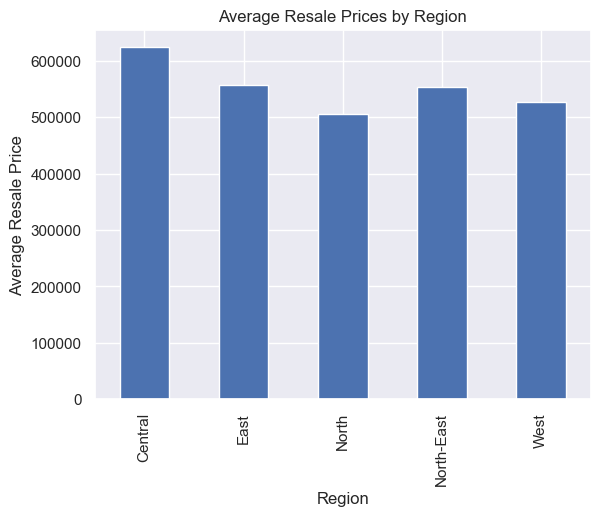

In [195]:
#Analysing the effect of region on resale prices

resale_data_cleaned.groupby('region')['resale_price'].mean().plot(kind='bar')
plt.title('Average Resale Prices by Region')
plt.xlabel('Region')
plt.ylabel('Average Resale Price')
plt.show()

It can be seen that housing in the Central region are generally more expensive than other regions and housing in the North region are the cheapest. 

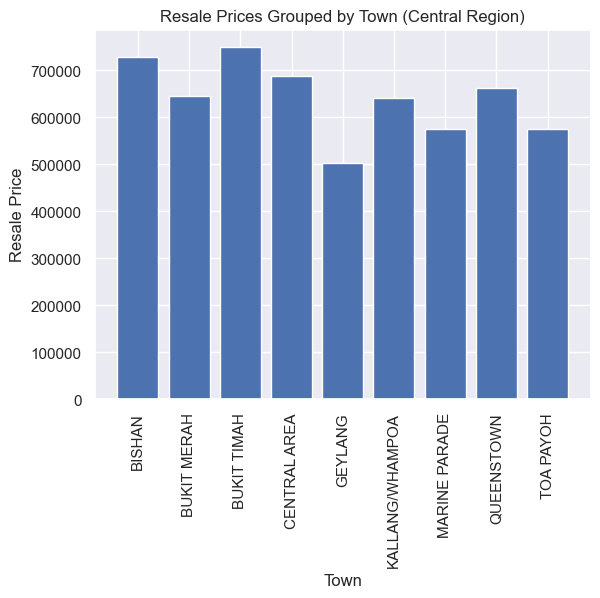

In [16]:
#Analysing effect of the town on resale prices of flats in different regions

central_data = resale_data_cleaned[resale_data_cleaned['region'] == 'Central']
grouped_data = central_data.groupby('town')['resale_price'].mean().reset_index()

plt.bar(grouped_data['town'], grouped_data['resale_price'])
plt.xticks(rotation=90)
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.title('Resale Prices Grouped by Town (Central Region)')
plt.show()

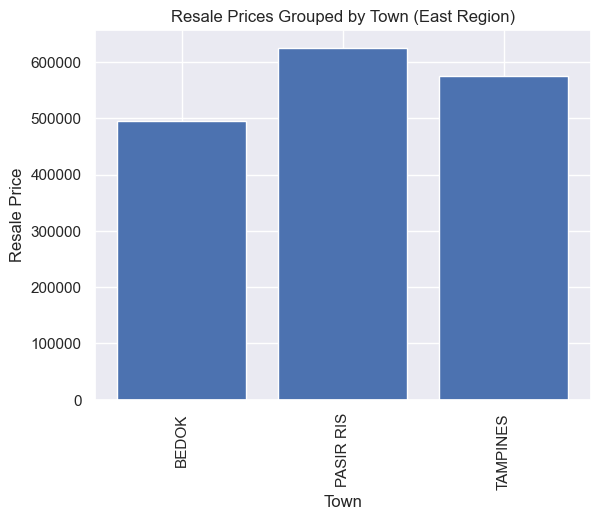

In [17]:
east_data = resale_data_cleaned[resale_data_cleaned['region'] == 'East']
grouped_data = east_data.groupby('town')['resale_price'].mean().reset_index()

plt.bar(grouped_data['town'], grouped_data['resale_price'])
plt.xticks(rotation=90)
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.title('Resale Prices Grouped by Town (East Region)')
plt.show()

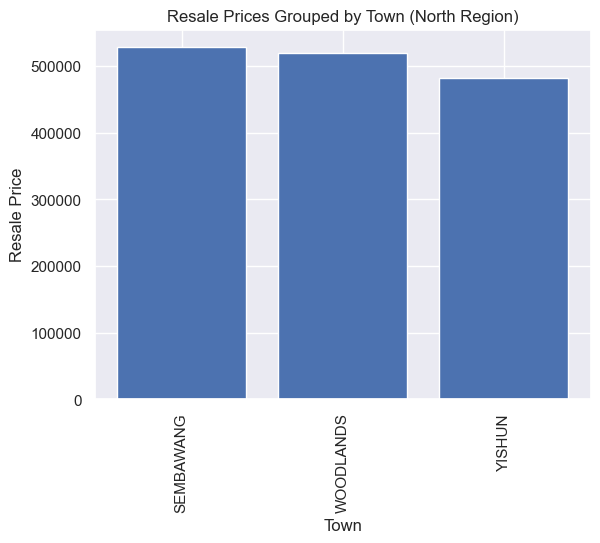

In [18]:
north_data = resale_data_cleaned[resale_data_cleaned['region'] == 'North']
grouped_data = north_data.groupby('town')['resale_price'].mean().reset_index()

plt.bar(grouped_data['town'], grouped_data['resale_price'])
plt.xticks(rotation=90)
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.title('Resale Prices Grouped by Town (North Region)')
plt.show()

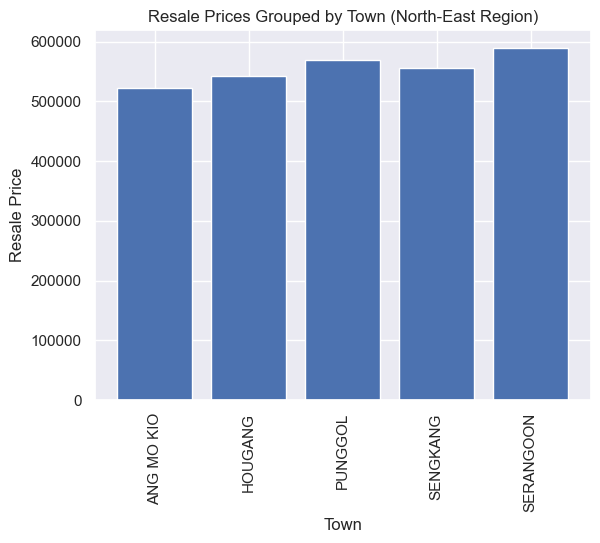

In [19]:
north_east_data = resale_data_cleaned[resale_data_cleaned['region'] == 'North-East']
grouped_data = north_east_data.groupby('town')['resale_price'].mean().reset_index()

plt.bar(grouped_data['town'], grouped_data['resale_price'])
plt.xticks(rotation=90)
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.title('Resale Prices Grouped by Town (North-East Region)')
plt.show()

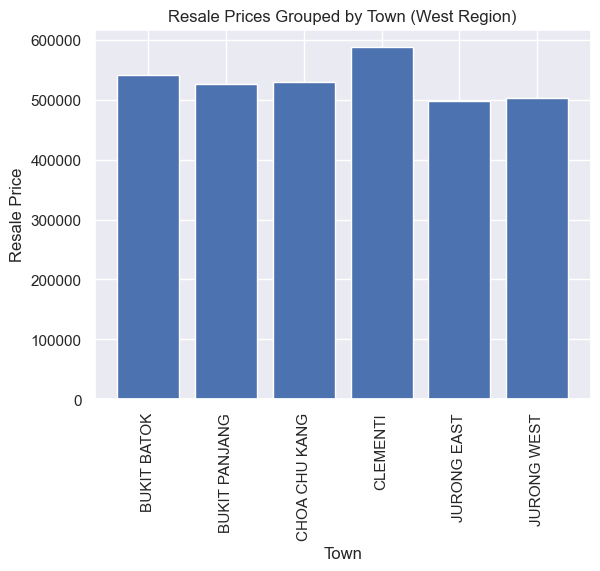

In [20]:
west_data = resale_data_cleaned[resale_data_cleaned['region'] == 'West']
grouped_data = west_data.groupby('town')['resale_price'].mean().reset_index()

plt.bar(grouped_data['town'], grouped_data['resale_price'])
plt.xticks(rotation=90)
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.title('Resale Prices Grouped by Town (West Region)')
plt.show()

Through the analysis of the resale prices based on the towns in different regions, it can be seen that even if the flats are in the same region, there can be differences in prices based on the towns as most obviously seen in the analysis of the Central Region.

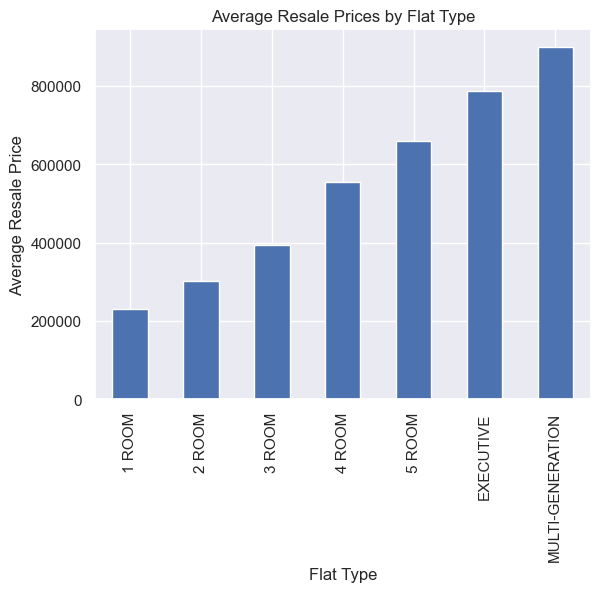

In [201]:
#Analysing the effect of flat type on resale prices

resale_data_cleaned.groupby('flat_type')['resale_price'].mean().plot(kind='bar')
plt.title('Average Resale Prices by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Average Resale Price')
plt.show()

As seen in the graph, the type of flat greatly affects the resale price of the flat, with 1 room flats being the cheapest and multi-generation being the most expensive.

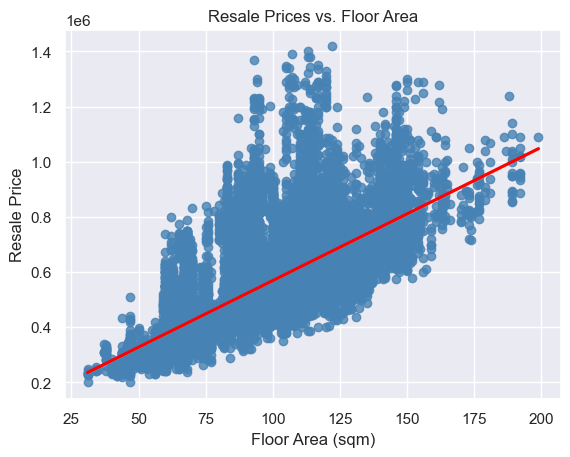

In [202]:
#Analysis on effect of floor area (sqm) on resale prices

sns.regplot(x="floor_area_sqm", y="resale_price", data=resale_data_cleaned, color='steelblue', line_kws={"color": "red"})
plt.title('Resale Prices vs. Floor Area')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.show()

It can be seen that floor area and resale price have a strong positive correlation

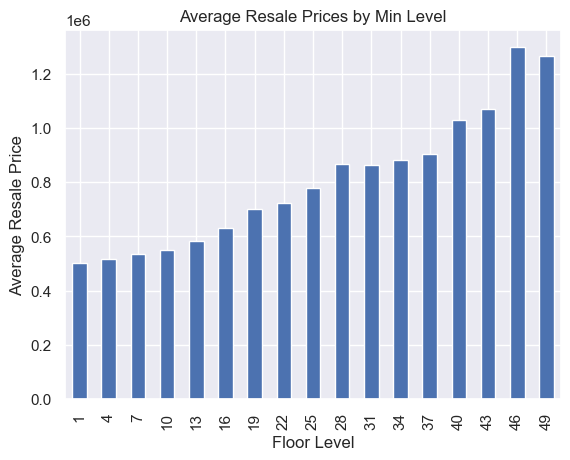

In [21]:
#Analysis on effect of flat level on resale price based on min_storey

resale_data_cleaned.groupby('min_storey')['resale_price'].mean().plot(kind='bar')
plt.title('Average Resale Prices by Min Level')
plt.xlabel('Floor Level')
plt.ylabel('Average Resale Price')
plt.show()

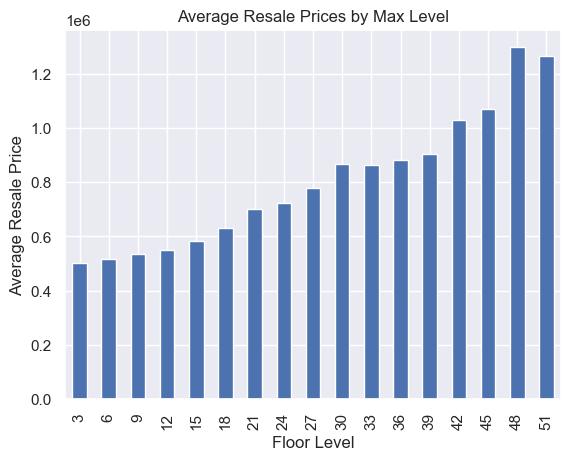

In [22]:
#Analysis on effect of flat level on resale price based on max_storey

resale_data_cleaned.groupby('max_storey')['resale_price'].mean().plot(kind='bar')
plt.title('Average Resale Prices by Max Level')
plt.xlabel('Floor Level')
plt.ylabel('Average Resale Price')
plt.show()

Based on the two graphs above, it can be concluded that lower level flats fetch a lower resale price as compared to higher level flats

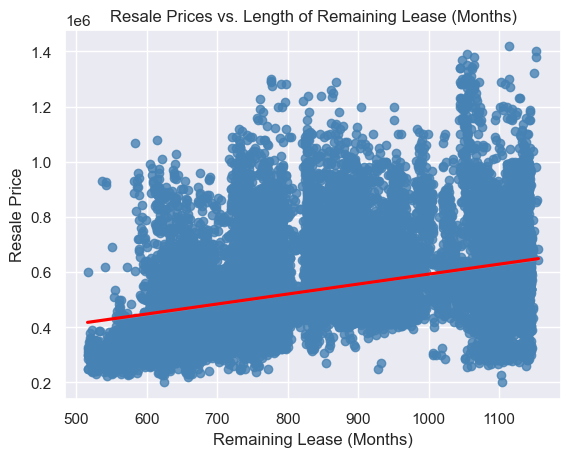

In [205]:
#Analysis on effect of length of remaining lease on resale prices

sns.regplot(x="remaining_lease_months", y="resale_price", data=resale_data_cleaned, color='steelblue', line_kws={"color": "red"})
plt.title('Resale Prices vs. Length of Remaining Lease (Months)')
plt.xlabel('Remaining Lease (Months)')
plt.ylabel('Resale Price')
plt.show()

There is also a slight direct relationship where the longer the remaining lease, the higher the resale flat.

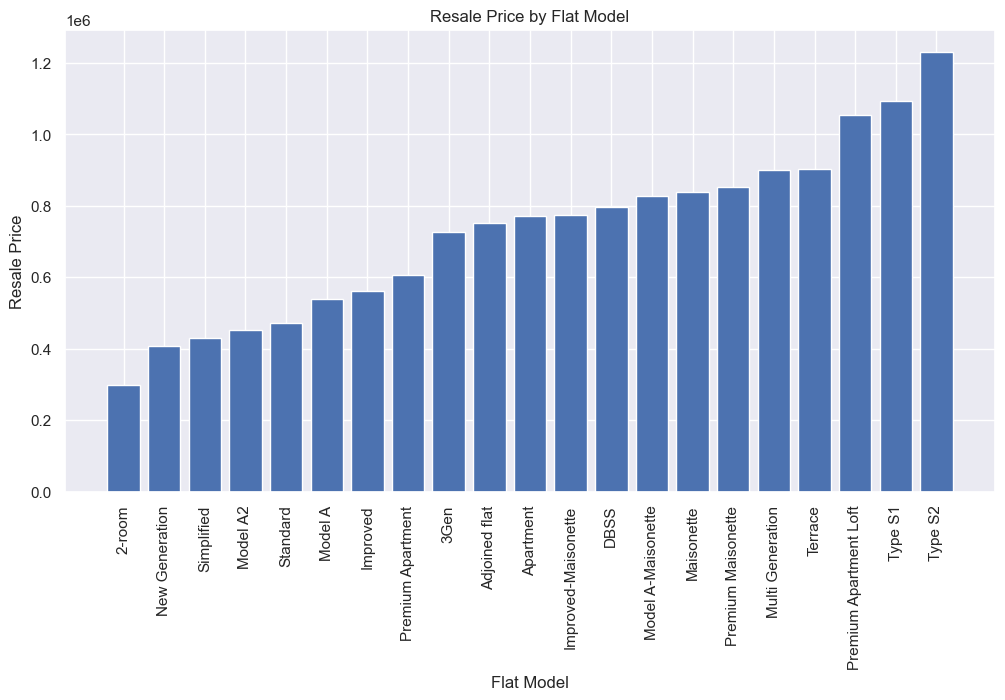

In [206]:
#Analysis of effect of flat model on resale prices

resale_data_flat = resale_data_cleaned.groupby('flat_model')['resale_price'].mean()
resale_data_flat_sorted = resale_data_flat.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(resale_data_flat_sorted.index, resale_data_flat_sorted.values)
ax.set_xlabel('Flat Model')
ax.set_ylabel('Resale Price')
ax.set_title('Resale Price by Flat Model')
plt.xticks(rotation=90)
plt.show()

The flat model of the flat clearly affects the price as shown in the graph above. For the different flat models, a 2-room flat model will fetch the lowest resale price while a Type S2 flat model will be the most expensive.

# Feature Selection

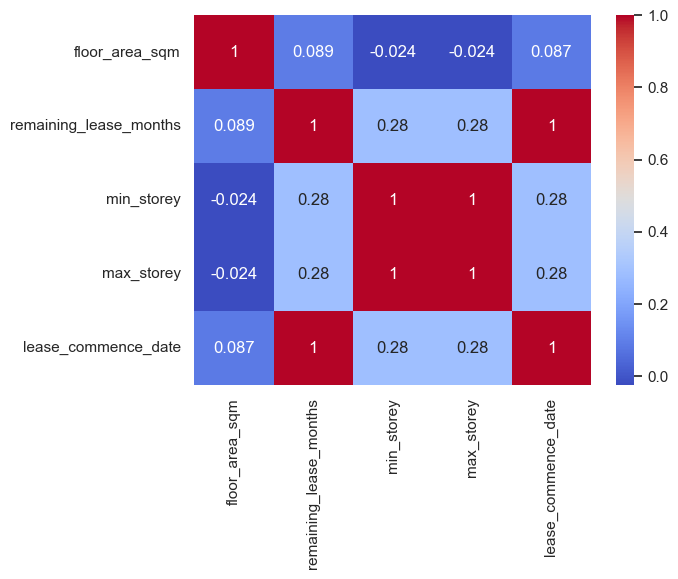

In [207]:
#Correlation Heatmap to remove colinear factors

# select columns for correlation analysis
corr_columns = ["floor_area_sqm", "remaining_lease_months", "min_storey","max_storey","lease_commence_date"]

# create correlation matrix
corr_matrix = resale_data_cleaned[corr_columns].corr()

# create heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

# show plot
plt.show()

Based on the correlation heatmap, lease_commence_date and remaining_lease_months are perfectly correlated with a correlation of 1. min_storey and max_storey are also perfectly correlated with a correlation factor of 1. Therefore we will remove lease_commence_date and max_storey from the feature selection to prevent multicollinearity issues.

In [208]:
#Creating new dataframe for predictive analysis with chosen features

resale_analysis = resale_data_cleaned[["town","region","flat_type","floor_area_sqm","flat_model","min_storey","remaining_lease_months","resale_price"]]

Our final dataset that will be used for analysis will contain 7 independent variables and 1 dependent variable based on our exploratory analysis and the correlation heatmap.

# Predictive Analysis

In [287]:
#Importing Libraris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [288]:
#Decision Tree

# Define X and y
X = resale_analysis.drop('resale_price', axis=1)
y = resale_analysis['resale_price']

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = tree_reg.predict(X_test)

# Evaluate the model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Model Performance:")
print("RMSE: {:.2f}".format(rmse))
print("R^2 Score: {:.2f}".format(r2))

Decision Tree Model Performance:
RMSE: 49995.44
R^2 Score: 0.92


The decision tree model has a Root Mean Square Error of 49995.44 and a R^2 Score of 0.92. This means that the model on average makes predictions that are off by around $49,995.44 and the model explains 92 percent of the variability in the dependent variables.

In [289]:
#Linear Regression

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Root mean squared error: {:.2f}".format(rmse))
print("R^2 score: {:.2f}".format(r2))

Root mean squared error: 58370.40
R^2 score: 0.88


The linear regression model has a Root Mean Square Error of 58370.40 and a R^2 Score of 0.88. This means that the model on average makes predictions that are off by around $58370.40 and the model explains 88 percent of the variability in the dependent variables.

With the evaluation of both models we can see that the decision tree model performs slightly better than the linear regression model and therefore we will use the decision tree model to help couples determine if the resale price for the flat they are paying for is worth it.

# Solution

We will create a function called predict_resale_price that allows users to input the details of the resale flat and it will use the decision tree model we developed earlier to estimate the price based on the details inputted and compare the estimated price with the inputted price to advise customers if the resale price is worth it.

In [315]:
one_hot_encoded_df = X
def predict_resale_price():
    # prompt user for input of independent variables
    town = input("Enter the town: ")
    region = input("Enter the region: ")
    flat_type = input("Enter the flat type: ")
    flat_model = input("Enter the flat model: ")
    floor_area = float(input("Enter the floor area in sqm: "))
    min_storey = int(input("Enter the minimum storey: "))
    remaining_lease = int(input("Enter the remaining lease in months: "))
    user_price = float(input("Enter the resale price:"))
    
    data = {
        "town" : [town],
        "region": [region],
        "flat_type": [flat_type],
        "flat_model" : [flat_model],
        "floor_area_sqm": [floor_area],
        "min_storey": [min_storey],
        "remaining_lease_months": [remaining_lease]}

    user_input = pd.DataFrame(data)
    user_input_encoded = pd.get_dummies(user_input)
    
    # reindex and fill NaNs to ensure columns match original dataset
    user_input_encoded = user_input_encoded.reindex(columns=one_hot_encoded_df.columns, fill_value=0)
    
    # predict resale price using the decision tree model
    predicted_price = tree_reg.predict(user_input_encoded)
    
    # determine if user inputted price is higher or lower than predicted price
    if predicted_price < user_price:
        print("The predicted resale price is ${:,.2f}, which is lower than the inputted price.".format(predicted_price[0]))
    else:
        print("The predicted resale price is ${:,.2f}, which is higher than the inputted price.".format(predicted_price[0]))
        
    return

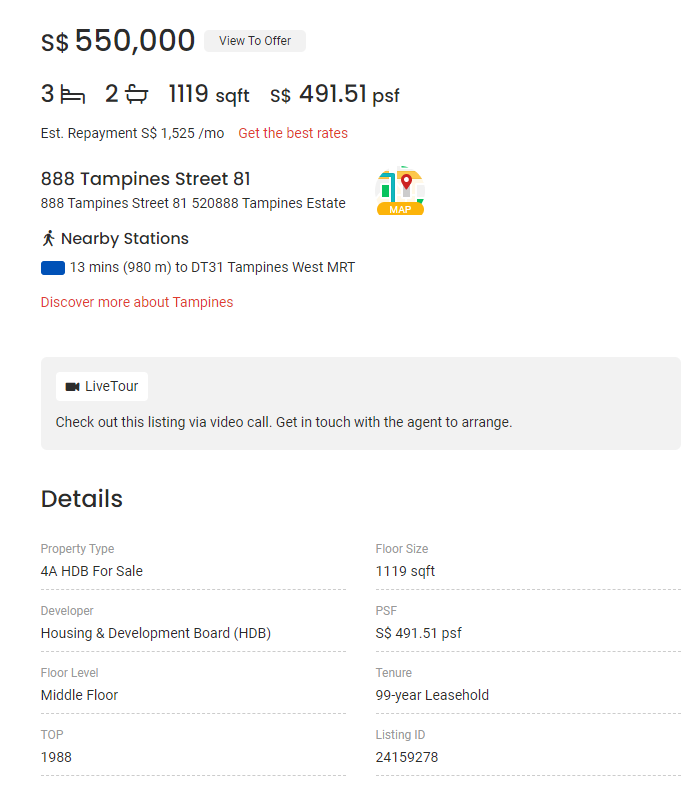


Using a listing from PropertyGuru as example:\
Town: TAMPINES\
Region: East\
Flat Type: 4 ROOM\
Flat Model: Model A\
Floor Area: 103.9585\
Minimum Storey: 10\
Remiaing Lease: 765\
Resale Price: $550,000\

In [318]:
predict_resale_price()

Enter the town: TAMPINES
Enter the region: East
Enter the flat type: 4 ROOM
Enter the flat model: Model A
Enter the floor area in sqm: 103.9585
Enter the minimum storey: 10
Enter the remaining lease in months: 765
Enter the resale price:550000
The predicted resale price is $545,000.00, which is lower than the inputted price.


# Final Evaluation

Despite the high accuracy on the model, there are a multitude of other factors that could affect a flat’s resale price that are not recorded in the original dataset. Certain ways that could be used to improve on the accuracy of the model would be to determine the distance from the flat to the nearest bus station using geolocation APIs as convenience of transport is a huge factor when determining resale prices of flats. Intangible factors that cannot be recorded down such as condition of the house are key to determining a resale price for a flat as well. Therefore, the estimation should be used in conjunction with a visit down to the house and not used solely on its own. 